In [1]:
%load_ext autoreload
%autoreload 2

# import builtins
# from IPython.lib import deepreload
# builtins.reload = deepreload.reload

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np

def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

# from http://cocodataset.org/#explore?id=345434
image = load("http://farm3.staticflickr.com/2469/3915380994_2e611b1779_z.jpg") # BGR
imshow(image)

from maskrcnn_benchmark.config import cfg
import sys
sys.path.append('./maskrcnn-benchmark/demo')
from predictor import COCODemo

config_file = "./maskrcnn-benchmark/configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cpu"])

coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)
# load image and then run prediction
# image = 
bboxes, top_predictions = coco_demo.run_on_opencv_image(image)

256
Image sizes: (480, 640, 3) --> torch.Size([3, 800, 1066])
bbb
torch.Size([1, 256, 200, 272])
torch.Size([1, 256, 100, 136])
torch.Size([1, 256, 50, 68])
torch.Size([1, 256, 25, 34])
torch.Size([1, 256, 13, 17])
bbb torch.Size([1000, 1024])


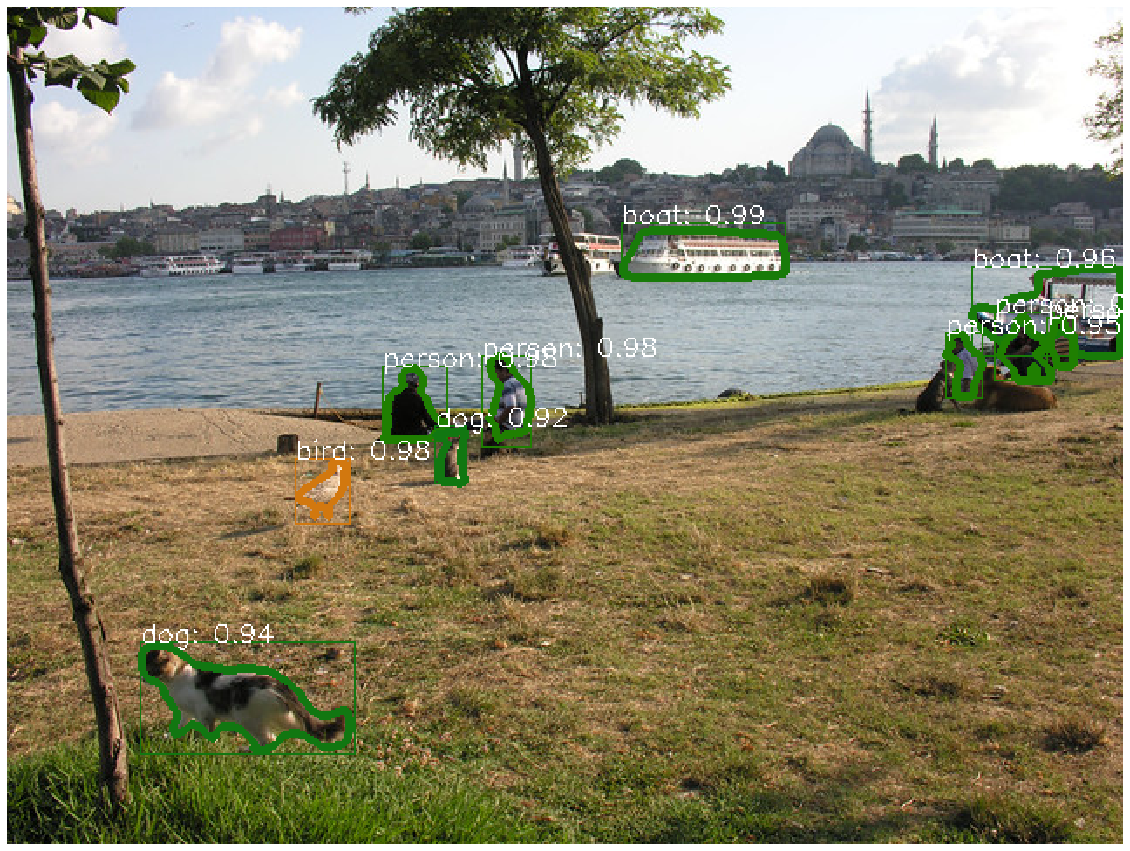

In [2]:
plt.figure(figsize=(20, 20))
imshow(predictions)

In [4]:
bboxes = top_predictions.convert('xywh').bbox.numpy()
labels = top_predictions.get_field("labels").tolist()
labels = [coco_demo.CATEGORIES[i] for i in labels]
scores = top_predictions.get_field("scores").tolist()

plt.imshow(image)
ax = plt.gca()
for bbox, label, score in zip(bboxes, labels, scores):
    if label=='person':
        rect = Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='lime' if if_valid else 'r', facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
        plt.text(bbox[0], bbox[1]+bbox[3]+6, '%s %.2f'%(label, score),  fontsize=12, bbox=dict(facecolor='lime', alpha=0.5))
plt.show()

CfgNode({'MODEL': CfgNode({'RPN_ONLY': False, 'MASK_ON': True, 'RETINANET_ON': False, 'KEYPOINT_ON': False, 'DEVICE': 'cpu', 'META_ARCHITECTURE': 'GeneralizedRCNN', 'CLS_AGNOSTIC_BBOX_REG': False, 'WEIGHT': 'catalog://Caffe2Detectron/COCO/35858933/e2e_mask_rcnn_R-50-FPN_1x', 'BACKBONE': CfgNode({'CONV_BODY': 'R-50-FPN', 'FREEZE_CONV_BODY_AT': 2}), 'FPN': CfgNode({'USE_GN': False, 'USE_RELU': False}), 'GROUP_NORM': CfgNode({'DIM_PER_GP': -1, 'NUM_GROUPS': 32, 'EPSILON': 1e-05}), 'RPN': CfgNode({'USE_FPN': True, 'ANCHOR_SIZES': (32, 64, 128, 256, 512), 'ANCHOR_STRIDE': (4, 8, 16, 32, 64), 'ASPECT_RATIOS': (0.5, 1.0, 2.0), 'STRADDLE_THRESH': 0, 'FG_IOU_THRESHOLD': 0.7, 'BG_IOU_THRESHOLD': 0.3, 'BATCH_SIZE_PER_IMAGE': 256, 'POSITIVE_FRACTION': 0.5, 'PRE_NMS_TOP_N_TRAIN': 2000, 'PRE_NMS_TOP_N_TEST': 1000, 'POST_NMS_TOP_N_TRAIN': 2000, 'POST_NMS_TOP_N_TEST': 1000, 'NMS_THRESH': 0.7, 'MIN_SIZE': 0, 'FPN_POST_NMS_TOP_N_TRAIN': 2000, 'FPN_POST_NMS_TOP_N_TEST': 1000, 'FPN_POST_NMS_PER_BATCH': Tr

In [6]:
image
# plt.imshow(image)
# plt.show()

array([[[  7,  41,  31],
        [ 26,  53,  44],
        [ 36,  56,  51],
        ...,
        [252, 248, 247],
        [251, 247, 246],
        [253, 248, 247]],

       [[ 19,  16,  12],
        [ 16,  14,  13],
        [ 20,  18,  17],
        ...,
        [251, 249, 248],
        [251, 247, 246],
        [252, 247, 246]],

       [[ 22,  18,  17],
        [ 12,  13,  11],
        [  7,  12,  10],
        ...,
        [253, 251, 250],
        [253, 249, 248],
        [253, 249, 248]],

       ...,

       [[ 24,  43,  34],
        [  2,  18,  11],
        [  0,  22,  17],
        ...,
        [ 23,  68,  89],
        [ 32,  80,  98],
        [ 28,  80,  96]],

       [[ 27,  76,  62],
        [ 37,  85,  73],
        [ 33,  83,  73],
        ...,
        [ 53,  96, 117],
        [ 66, 118, 135],
        [ 49, 110, 124]],

       [[ 17,  38,  29],
        [ 25,  46,  38],
        [ 30,  52,  47],
        ...,
        [ 45,  90, 111],
        [ 26,  83,  98],
        [ 28, 100, 108]]

In [3]:
print(bboxes.fields())
bboxes.get_field('scores')

['labels', 'scores', 'mask']


tensor([0.9799, 0.9808, 0.8350, 0.8467, 0.2627, 0.6305, 0.4881, 0.9514, 0.4193,
        0.2037, 0.1342, 0.4430, 0.1276, 0.2867, 0.0519, 0.0615, 0.5554, 0.2420,
        0.1112, 0.3603, 0.0574, 0.1311, 0.0506, 0.1491, 0.9616, 0.9861, 0.6532,
        0.5592, 0.1527, 0.0535, 0.6335, 0.3377, 0.0598, 0.1324, 0.1656, 0.0570,
        0.1536, 0.0803, 0.1766, 0.1071, 0.3502, 0.0639, 0.0975, 0.0991, 0.0903,
        0.0842, 0.0716, 0.1794, 0.1259, 0.2379, 0.1151, 0.2496, 0.1950, 0.0807,
        0.1536, 0.2022, 0.1285, 0.9839, 0.0805, 0.0866, 0.0702, 0.6154, 0.1362,
        0.9244, 0.1442, 0.9425, 0.1338, 0.1305, 0.1564, 0.0952, 0.1249, 0.1561,
        0.1573])